In [67]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test Correlations in the Hammersley Generator
---
The Hammerlsey sequence should produce random numbers on (0,1) that are less correlated than the basic random generator:

In [36]:
from distgen.dist import random_generator

rands = random_generator((4,10000), sequence='hammersley')
cov = np.cov(rands)


print(cov)

[[ 8.33378498e-02 -3.41661815e-05 -7.42358217e-06  4.08750480e-05]
 [-3.41661815e-05  8.33337764e-02  4.06457444e-06  3.37478315e-05]
 [-7.42358217e-06  4.06457444e-06  8.33415660e-02  9.92303088e-05]
 [ 4.08750480e-05  3.37478315e-05  9.92303088e-05  8.33250008e-02]]


In [37]:
rands = random_generator((4,10000), sequence='pseudo')
cov = np.cov(rands)
print(cov)


[[ 0.08350747  0.00137672 -0.00087836  0.00064044]
 [ 0.00137672  0.08337021 -0.00119957 -0.00069267]
 [-0.00087836 -0.00119957  0.08459257 -0.00026799]
 [ 0.00064044 -0.00069267 -0.00026799  0.08280561]]


# Radial Distributions
---
# Test correlation in sin(theta)cos(theta)

In [43]:
import math
rands = random_generator((2,10000), sequence='hammersley')
np.sum( np.cos(2*math.pi)*rands[1,:] * np.sin(2*math.pi)*rands[1,:])

-8.163903819533452e-13

In [44]:
rands = random_generator((2,10000), sequence='pseudo')
np.sum( np.cos(2*math.pi)*rands[1,:] * np.sin(2*math.pi)*rands[1,:])

-8.1629114952558e-13

# Generate x,y for uniform dist and check correlation


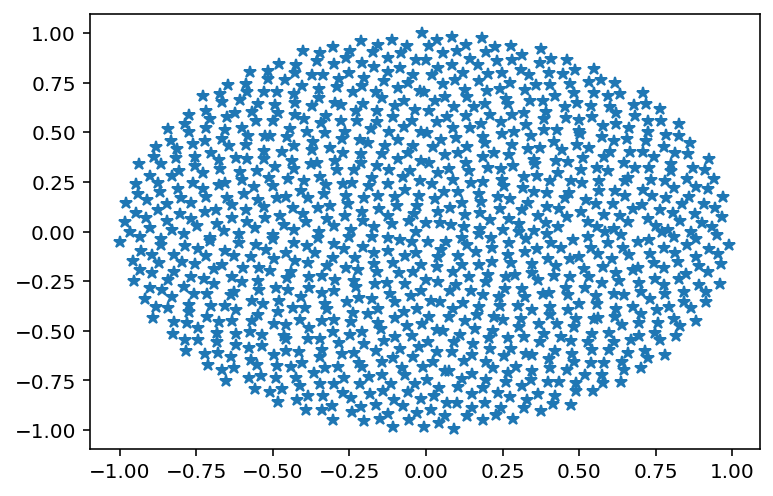

In [76]:
R = 1
N=1000

rands = random_generator((2,N), sequence='hammersley')
rands2 = random_generator( (2,N), sequence='pseudo')
rands3 = np.linspace(0,1,N)


rs = R*np.sqrt(rands[0,:]) 
xs = rs*np.cos(2*math.pi*rands3)
ys = rs*np.sin(2*math.pi*rands3)

plt.plot(xs,ys,'*');

In [77]:
np.mean( (xs-xs.mean())*(ys-ys.mean()))

-0.0002624831573568045